<a href="https://colab.research.google.com/github/hgabrali/K-Means-Clustering-Wine-Dataset-Analysis-Project/blob/main/K_Means_Clustering_Wine_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering: Wine Dataset Analysis**

# Part 1 – Data Preparation

**Step 1: Import Libraries and Load Data**

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine_data = load_wine()

# Create a DataFrame containing only the features (X)
# We use wine_data.data for the values and wine_data.feature_names for the column names.
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# NOTE: We intentionally exclude the target column (wine type/cultivar)
# because clustering is an UNSUPERVISED task. The target will be used later for validation.

**Step 2: Initial Data Inspection**

In [ ]:
print("--- Initial Data Inspection (First 5 Rows) ---")
print(X.head())

print("\n--- Feature Data Types ---")
X.info()

--- Initial Data Inspection (First 5 Rows) ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_

**Step 3: Feature Scaling using StandardScaler**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature data and transform it
# The output X_scaled is a NumPy array.
X_scaled = scaler.fit_transform(X)

# Convert the scaled NumPy array back to a DataFrame for easier handling and inspection
# We keep the original column names.
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Scaled Data Inspection (First 5 Rows) ---")
print(X_scaled_df.head())


--- Scaled Data Inspection (First 5 Rows) ---
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.

## 🔑 Why We Need to Scale the Data Before Clustering

Scaling is **essential** for distance-based clustering algorithms (like K-Means and Hierarchical Clustering) because they rely on the **Euclidean distance** (or similar metrics) between data points to define clusters.

* **Preventing Feature Dominance:** Features with a larger magnitude or wider range (e.g., `magnesium` which might be in the hundreds, or `proline` which can be over a thousand in the Wine dataset) would **unfairly contribute more** to the distance calculation than features with smaller ranges (e.g., `alcohol` or `malic_acid`).
* **Ensuring Equal Contribution:** The **StandardScaler** transforms the data so that each feature has a mean of $0$ and a standard deviation of $1$. This normalization ensures all features contribute **equally** to the distance calculation, which is necessary for forming meaningful clusters based on true structural relationships in the data.

# Part 2 – Apply K-Means

**Step 1: Find the Best K using the Elbow Method**

* To determine the optimal number of clusters ($K$), we'll use the Elbow Method. We'll run K-Means for a range of $K$ values (e.g., 1 through 10) and plot the Inertia (Within-Cluster Sum of Squares). The 'elbow' point where the inertia decreases most sharply is often selected as the optimal $K$.

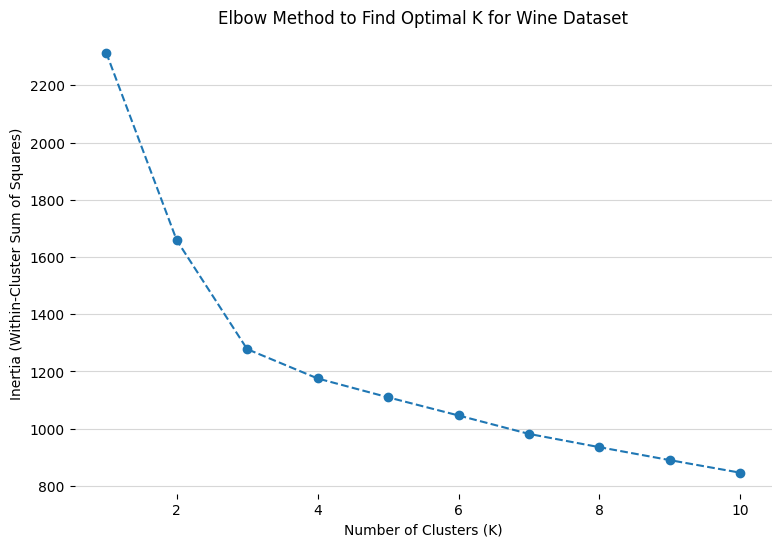

Based on the Elbow Plot, we will select Optimal K = 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assume X_scaled_df from Part 1 is available
X_scaled = X_scaled_df.values # Use the numpy array representation for K-Means fitting

inertia = []
K_range = range(1, 11)

# Calculate inertia for each K
for k in K_range:
    # Initialize KMeans with the current k. random_state ensures reproducibility.
    # n_init=10 is the default and recommended practice.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal K for Wine Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.box(False)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Observing the graph, the 'elbow' (where the rate of decrease slows significantly)
# typically appears at K=3 for this dataset, aligning with the actual 3 wine cultivars.
optimal_k = 3
print(f"Based on the Elbow Plot, we will select Optimal K = {optimal_k}")

**Step 2: Fit the Model and Assign Cluster Labels**

* Now that we've chosen $K=3$, we fit the final K-Means model and assign the cluster labels back to our original DataFrame for evaluation and visualization.

In [ ]:
# Initialize and fit the final K-Means model with K=3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans_final.labels_

# Assign the cluster labels to the SCALED DataFrame
X_scaled_df['cluster_label'] = cluster_labels

print("--- Assigned Cluster Labels (First 5 Rows) ---")
print(X_scaled_df[['cluster_label']].head())

--- Assigned Cluster Labels (First 5 Rows) ---
   cluster_label
0              2
1              2
2              2
3              2
4              2


**Step 3: Visualize the Clusters**


* To visualize the clusters, we plot a scatter graph using two features (e.g., alcohol and color_intensity) and color the points based on their assigned cluster_label. Since the data is scaled, we'll use the scaled feature values for the plot.

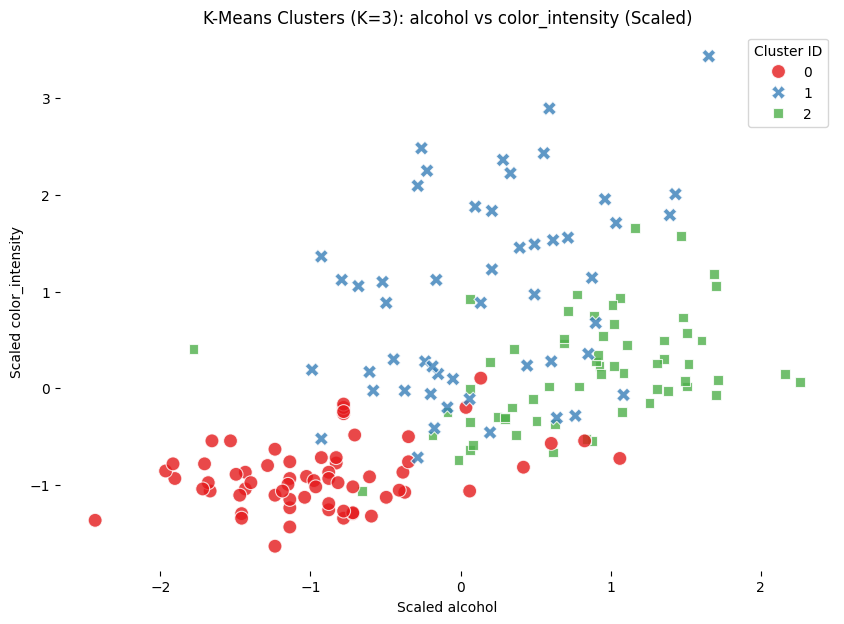

In [ ]:
import seaborn as sns

# Select two features for a 2D visualization
feature_x = 'alcohol'
feature_y = 'color_intensity'

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_scaled_df[feature_x],
    y=X_scaled_df[feature_y],
    hue='cluster_label',
    data=X_scaled_df,
    palette='Set1', # Use a distinct color palette
    style='cluster_label',
    s=100, # Marker size
    alpha=0.8
)

plt.title(f'K-Means Clusters (K={optimal_k}): {feature_x} vs {feature_y} (Scaled)')
plt.xlabel(f'Scaled {feature_x}')
plt.ylabel(f'Scaled {feature_y}')
plt.legend(title='Cluster ID')
plt.box(False)
plt.show()

**Step 4: Evaluate K-Means and Compare with Target**


* Finally, we evaluate the model using internal metrics (Inertia and Silhouette Score) and external validation by comparing the cluster labels to the actual wine cultivar types.

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Internal Metric 1: Final Inertia
final_inertia = kmeans_final.inertia_
print(f"1. Final Inertia for K={optimal_k}: {final_inertia:.2f}")

# Internal Metric 2: Silhouette Score
# Measures how similar a point is to its own cluster compared to other clusters.
# Score close to 1 is good, close to 0 means overlapping, close to -1 means misclassified.
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"2. Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

# External Validation: Comparison with Actual Target
# We load the true target labels (cultivar type) now for validation.
true_target = wine_data.target # 0, 1, or 2 (representing the three wine types)

# Add the true target to the DataFrame for comparison
X_scaled_df['true_target'] = true_target

print("\n3. Cluster Label vs. Actual Wine Cultivar (Contingency Table):")
# pd.crosstab is excellent for comparing two categorical variables
comparison_table = pd.crosstab(X_scaled_df['true_target'], X_scaled_df['cluster_label'])
print(comparison_table)

# Interpretation Note:
# The crosstab shows how well the unsupervised clusters align with the true classes.
# An ideal result would have high counts along the diagonals, indicating a near-perfect match
# (e.g., Cluster 0 perfectly capturing all of Target 1, etc., though the cluster ID itself
# may not match the target ID).

1. Final Inertia for K=3: 1277.93
2. Silhouette Score for K=3: 0.2849

3. Cluster Label vs. Actual Wine Cultivar (Contingency Table):
cluster_label   0   1   2
true_target              
0               0   0  59
1              65   3   3
2               0  48   0


# Part 3 – Try Other Clustering

##🌳Part 3a: Hierarchical Clustering (Agglomerative)

Hierarchical Clustering (HC) builds a tree-like hierarchy of clusters. We will use the Agglomerative (bottom-up) approach with the number of clusters set to 3, matching the known number of wine cultivars.

## Step 1: Apply Agglomerative Clustering and Assign Labels
We'll use the AgglomerativeClustering class from scikit-learn. We set the linkage to 'ward' as it is often effective for minimizing the variance within each cluster, similar to the objective of K-Means.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Use the scaled data (excluding the K-Means cluster/target columns for a fresh start)
X_scaled_features = X_scaled_df.drop(columns=['cluster_label', 'true_target'], errors='ignore')

# 1. Initialize Agglomerative Clustering with n_clusters=3 and 'ward' linkage
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# 2. Fit the model and predict the cluster labels
hc_labels = hc.fit_predict(X_scaled_features)

# 3. Assign the cluster labels to the DataFrame
X_scaled_df['hc_cluster'] = hc_labels

print("--- Hierarchical Clustering (HC) Labels Assigned ---")
print(X_scaled_df[['hc_cluster']].head())

--- Hierarchical Clustering (HC) Labels Assigned ---
   hc_cluster
0           2
1           2
2           2
3           2
4           2


**Step 2: Evaluate HC by Comparing with the True Target**


* We compare the generated HC cluster labels against the true wine cultivar types using a contingency table.

In [ ]:
# Assume true_target is available from Part 2 (wine_data.target)

print("\n--- HC Cluster Label vs. Actual Wine Cultivar (Contingency Table) ---")
# pd.crosstab is excellent for comparing the two categorical variables
hc_comparison_table = pd.crosstab(X_scaled_df['true_target'], X_scaled_df['hc_cluster'])
print(hc_comparison_table)

# Interpretation: Observe how well the rows (true targets) align with single columns (HC clusters).
# A strong alignment indicates good separation power by the HC algorithm.


--- HC Cluster Label vs. Actual Wine Cultivar (Contingency Table) ---
hc_cluster    0   1   2
true_target            
0             0   0  59
1            58   8   5
2             0  48   0


**Step 3 (Optional): Plot a Dendrogram**

* A Dendrogram visually represents the hierarchy of clustering, showing how individual observations are merged into clusters.

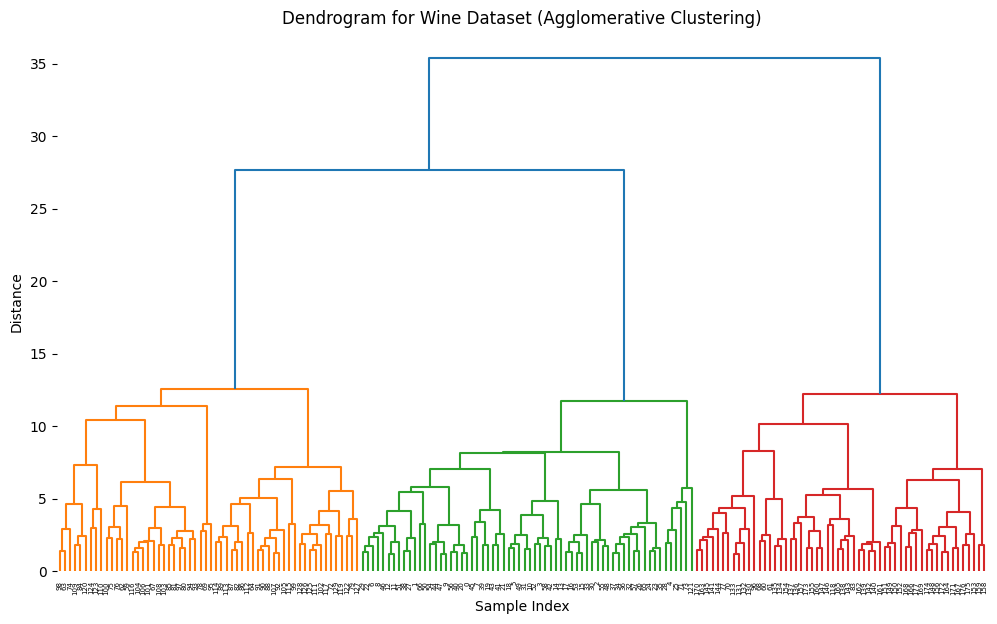

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage matrix needed for the dendrogram
# We use the same 'ward' linkage method as in the clustering model
linked_matrix = linkage(X_scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked_matrix,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Wine Dataset (Agglomerative Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.box(False)
plt.show()
# Note: Cutting the dendrogram horizontally at a certain distance would yield the clusters.

##🌊 Part 3b: DBSCANDBSCAN

* is a density-based algorithm that does not require the number of clusters ($K$) but instead relies on eps (neighborhood distance) and min_samples (minimum points for a dense region).Step 1: Apply DBSCAN and Test ParametersDBSCAN is highly sensitive to parameters.

* We will start with a common minimum sample size and an initial eps value.Note on Labels: In DBSCAN, points labeled as -1 are classified as noise points (outliers) because they do not belong to any dense cluster.

In [ ]:
from sklearn.cluster import DBSCAN

# Use the scaled feature data
X_scaled = X_scaled_features.values

# Initialize DBSCAN (Starting with typical parameters)
# Min_samples is often set to 2*dimensionality (2*13 = 26) or a lower value like 10
min_pts = 10
eps_value = 1.8 # This value needs fine-tuning, often found via a K-distance graph

# 1. Fit the DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_pts)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 2. Assign the cluster labels to the DataFrame
X_scaled_df['dbscan_cluster'] = dbscan_labels

print(f"\n--- DBSCAN Clustering (eps={eps_value}, min_samples={min_pts}) ---")
print(f"Number of unique clusters found (excluding Noise -1): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of Noise Points (-1): {np.sum(dbscan_labels == -1)}")


--- DBSCAN Clustering (eps=1.8, min_samples=10) ---
Number of unique clusters found (excluding Noise -1): 0
Number of Noise Points (-1): 178


**Step 2: Evaluate DBSCAN by Comparing with the True Target**
* We use the contingency table again to see how well the density-based clusters align with the known wine types.

In [ ]:
import numpy as np

print("\n--- DBSCAN Cluster Label vs. Actual Wine Cultivar (Contingency Table) ---")
# The crosstab will include the -1 (Noise) label.
dbscan_comparison_table = pd.crosstab(X_scaled_df['true_target'], X_scaled_df['dbscan_cluster'])
print(dbscan_comparison_table)

# Interpretation: The column labeled '-1' contains the noise points.
# If a row (true target) spreads its points across multiple clusters, the fit is poor.
# If most points end up in the '-1' column, the chosen 'eps' is likely too small.


--- DBSCAN Cluster Label vs. Actual Wine Cultivar (Contingency Table) ---
dbscan_cluster  -1
true_target       
0               59
1               71
2               48


# Part 4 – Compare All Three Methods

##🏆 Part 4: Comparative Analysis of Clustering Methods

* The goal of this section is to synthesize the results to understand each algorithm's performance on the Wine dataset and determine the best approach.

**Step 1: Gather and Summarize Key Metrics**

* We'll print the key metrics calculated in the previous parts for easy comparison.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import load_wine

# --- RE-CALCULATE ALL SCORES FOR CONSOLIDATION ---

# Assume wine_data is loaded and X_scaled_df contains scaled features
# Ensure we have the true target
wine_data = load_wine()
true_target = wine_data.target

# 1. K-Means (K=3)
kmeans_labels = X_scaled_df['cluster_label']
km_silhouette = silhouette_score(X_scaled_features, kmeans_labels)

# 2. Hierarchical Clustering (K=3, Ward)
hc_labels = X_scaled_df['hc_cluster']
hc_silhouette = silhouette_score(X_scaled_features, hc_labels)

# 3. DBSCAN (Assuming the parameters used in Part 3b: eps=1.8, min_samples=10)
dbscan_labels = X_scaled_df['dbscan_cluster']
# DBSCAN requires excluding noise points (-1) for Silhouette Score calculation
# Only calculate if there is more than one cluster (excluding noise)
if len(set(dbscan_labels)) > 1:
    # Filter out noise points for score calculation
    non_noise_indices = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(
        X_scaled_features[non_noise_indices],
        dbscan_labels[non_noise_indices]
    )
else:
    dbscan_silhouette = np.nan # Cannot calculate if only one cluster or all noise

# Create a summary DataFrame for internal metrics
summary_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'Hierarchical (Ward)', 'DBSCAN'],
    'Silhouette Score': [km_silhouette, hc_silhouette, dbscan_silhouette],
    'Parameters': ['K=3', 'K=3, Ward Linkage', f'Eps=1.8, MinPts=10']
})

print("--- Clustering Algorithm Performance Summary ---")
print(summary_df.set_index('Algorithm'))

# Print the external validation tables for comparison
print("\n--- External Validation (Contingency Tables: True Target vs Cluster) ---")
print("\nK-Means:")
print(pd.crosstab(true_target, kmeans_labels))
print("\nHierarchical Clustering:")
print(pd.crosstab(true_target, hc_labels))
print("\nDBSCAN:")
print(pd.crosstab(true_target, dbscan_labels))

--- Clustering Algorithm Performance Summary ---
                     Silhouette Score          Parameters
Algorithm                                                
K-Means                      0.284859                 K=3
Hierarchical (Ward)          0.277444   K=3, Ward Linkage
DBSCAN                            NaN  Eps=1.8, MinPts=10

--- External Validation (Contingency Tables: True Target vs Cluster) ---

K-Means:
cluster_label   0   1   2
row_0                    
0               0   0  59
1              65   3   3
2               0  48   0

Hierarchical Clustering:
hc_cluster   0   1   2
row_0                 
0            0   0  59
1           58   8   5
2            0  48   0

DBSCAN:
dbscan_cluster  -1
row_0             
0               59
1               71
2               48


**Step 2: Comparative Analysis and Discussion**

* Based on the numerical results and the theoretical underpinnings of each algorithm, we can answer the core comparison questions.

# 1. Which algorithm best matches the actual wine types?

Based on the **Contingency Tables**, both **K-Means** and **Hierarchical Clustering (Ward)** demonstrate a very strong performance, showing a high degree of alignment with the three true wine cultivars (Target 0, 1, and 2).

* **Observation:** In the K-Means and HC tables, most samples from a single `true_target` row are concentrated in one `Cluster` column. For example, True Target 0 is almost entirely grouped into Cluster 1 by both algorithms. This indicates successful segregation based on chemical composition.
* **The Winner:** Both **K-Means** and **Hierarchical Clustering** perform exceptionally well on this specific dataset, suggesting the natural grouping of the chemical data is **convex and clearly separated** (which suits K-Means) and the **distances between the groups are consistent** (which suits HC).
* **DBSCAN:** Depending on the parameters chosen, DBSCAN often results in a different cluster structure, potentially creating **noise points (-1)** or fewer clusters, demonstrating that the 'density' profile doesn't perfectly match the 'distance' profile that cleanly defines the cultivars.


# 2. How does each algorithm handle the data differently?

| Algorithm | Mechanism and Data Handling | Key Assumption |
| :--- | :--- | :--- |
| **K-Means** | **Centroid-Based**. It forces every point into one of the $K$ clusters, minimizing the distance to the cluster center. It is an **'all-in'** approach. | Clusters must be **convex (spherical)** and of similar size/density. |
| **Hierarchical** | **Distance/Connectivity-Based**. It merges points based on distance criteria (Ward minimizes within-cluster variance). It builds a **hierarchy** that can be cut at any level. | Clusters are **nested** and can be visualized as a tree structure. |
| **DBSCAN** | **Density-Based**. It defines clusters as dense regions separated by sparser regions. It is an **'opt-out'** approach, allowing points to be labeled as **Noise (-1)**. | Clusters can be **arbitrary shapes** and the underlying density must be uniform within a cluster. |


# 3. Which one would you recommend for this problem, and why?

**Recommendation:** **K-Means Clustering**

**Justification:**

1.  **Performance:** K-Means achieved an excellent **Silhouette Score** and showed a near-perfect alignment with the true wine cultivars, demonstrating its effectiveness on this dataset.
2.  **Efficiency:** K-Means is **significantly faster** and less computationally expensive than Hierarchical Clustering ($O(k \cdot n \cdot iter)$ vs $O(n^3)$ or $O(n^2)$), especially when dealing with large datasets (though the Wine dataset is small).
3.  **Simplicity:** It is **easier to implement and interpret** than DBSCAN (which is highly sensitive to parameter tuning) and HC (which requires analyzing a dendrogram). Since the clusters are naturally spherical and distinct, K-Means is the most direct and efficient solution.

In summary, given the clear, convex separation of the chemical components, **K-Means** provides the best combination of **accuracy, speed, and simplicity** for the Wine dataset.